In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
# Dlugosc od mocowania do srodka ciezkosci wahadła
L = 0.96

In [7]:
# Wczytanie danych z pominieciem okresu do pierwszego wzniesienia wahadla
df = pd.read_csv("video4.csv", names=['x','y','time'])[25:]
df.head()

,x,y,time
25,1818,857,0.416
26,1815,858,0.433
27,1809,861,0.450
28,1802,864,0.466
29,1792,868,0.483


Wyczyszczenie danych

In [8]:
for index, row in df.iterrows():
    if row['x'] < 10 or row['x'] > 1900 or row['y'] < 800 or row['y'] > 1100:
        df.drop(index, inplace=True)

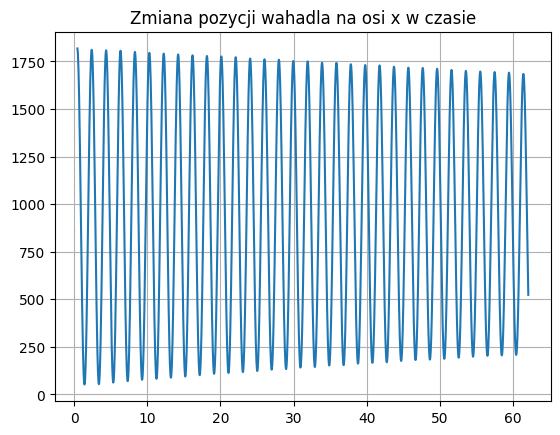

In [9]:
plt.plot(df["time"], df["x"])
plt.title('Zmiana pozycji wahadla na osi x w czasie')
plt.grid(True)

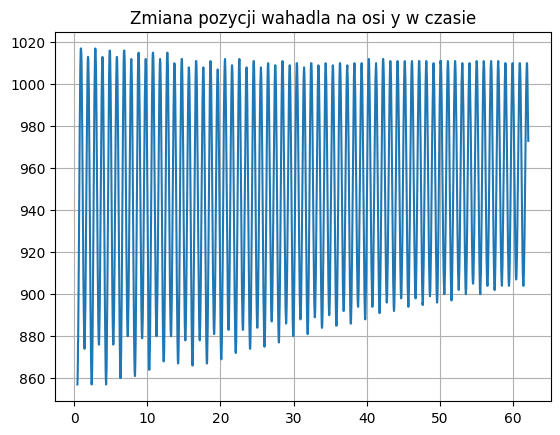

In [10]:
plt.plot(df["time"], df["y"])
plt.title('Zmiana pozycji wahadla na osi y w czasie')
plt.grid(True)

Przekonwertowanie danych y tak, zeby skala zmiany zaczynala sie od 0.


In [11]:
def przelicz_y(value):
    return max(df['y'])-value

df['y'] = df['y'].apply(przelicz_y)

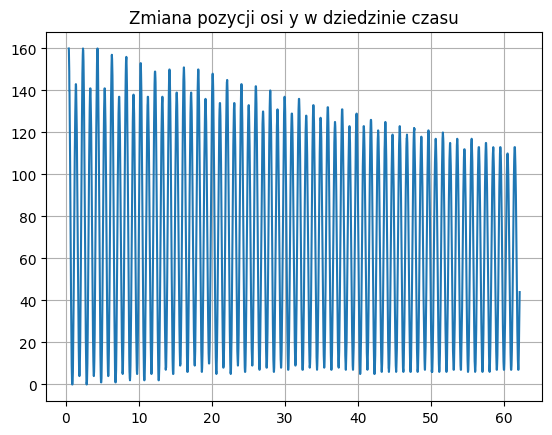

In [12]:
plt.plot(df["time"], df["y"])
plt.title('Zmiana pozycji osi y w dziedzinie czasu')
plt.grid(True)

Okres wahadla

In [13]:
# Próg
threshold = 20

# Licznik wejść powyżej progu
entry_count = -1
entry_times = []


last_value = None
below_threshold = True # Flaga określająca, czy wahadlo znajduje sie ponizej punktu

for i, value in enumerate(df['y']):
  if last_value == None:
    last_value = value
  elif last_value < value and value > 20 and below_threshold:
    entry_count += 1
    entry_times.append(df['time'].iloc[i])
    below_threshold = False
  elif value < 20 and last_value < 20:
    below_threshold = True
  last_value = value

entry_count = entry_count/2 # podzielone na 2, bo dwa razy wartosc y zwieksza sie na jeden okres
T = (entry_times[-1]-entry_times[0])/(entry_count)

print("Liczba wejść powyżej progu:", entry_count/2)
print("Okres:", T)


Liczba wejść powyżej progu: 15.5
Okres: 1.9679999999999997


Przyspieszenie ziemskie

In [14]:
g = L*4*np.pi**2/2**2
print(g)

9.474820225045784


Energia kinetyczna i potencjalna

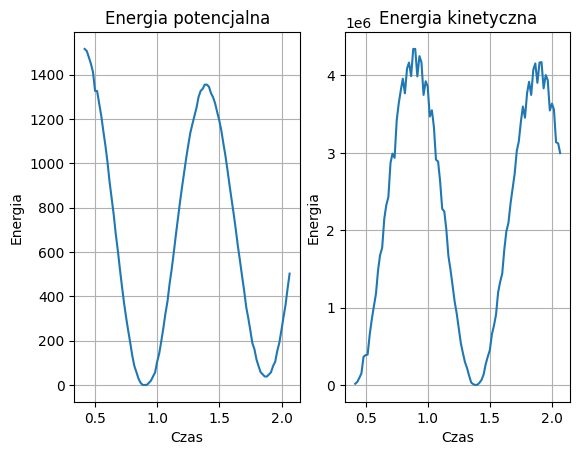

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x = df['x'].values
y = df['y'].values
t = df['time'].values

# Obliczanie prędkości (dx/dt, dy/dt)
dx_dt = np.gradient(x, t)
dy_dt = np.gradient(y, t)

# Obliczanie energii potencjalnej (mgh)
potential_energy = g * y

# Obliczanie energii kinetycznej (0.5 * m * v^2)
kinetic_energy = 0.5 * (dx_dt**2 + dy_dt**2) # m pominiete

# Tworzenie wykresu energii w zależności od czasu w podanym zakresie
zakres1 = 0
zakres2 = 100

fig, axs = plt.subplots(1,2)

plt.sca(axs[0])
plt.title('Energia potencjalna')
plt.xlabel('Czas')
plt.ylabel('Energia')
plt.grid(True)
plt.plot(t[zakres1:zakres2], potential_energy[zakres1:zakres2], label='Energia potencjalna')

plt.sca(axs[1])
plt.title('Energia kinetyczna')
plt.xlabel('Czas')
plt.ylabel('Energia')
plt.grid(True)
plt.plot(t[zakres1:zakres2], kinetic_energy[zakres1:zakres2], label='Energia kinetyczna')

plt.show()

Stala czasowa zaniku drgan

Wartość stałej czasowej zaniku drgań: 218.632286912186
Czas ruchu wahadla: 16.78064815637322 minut


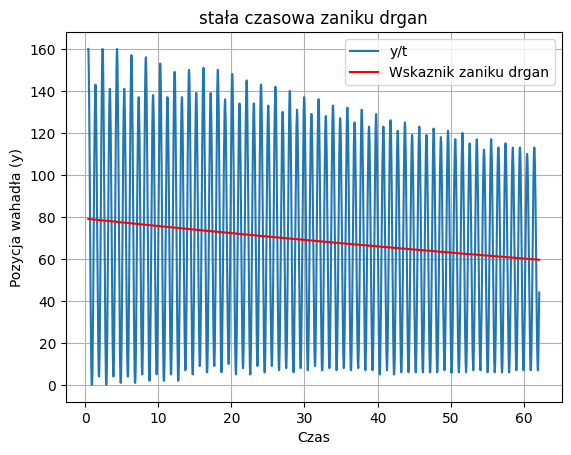

In [16]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

x = df['x'].values
y = df['y'].values
t = df['time'].values

def exponential_decay(t, A, tau):
    return A * np.exp(-t / tau)

popt, pcov = curve_fit(exponential_decay, t, y)

# Wartość stałej czasowej zaniku drgań
tau = popt[1]
# Obliczenie czasu, gdy amplituda spadnie poniżej 1% początkowej wartości
end_time = -tau * np.log(0.01)

print("Wartość stałej czasowej zaniku drgań:", tau)
print("Czas ruchu wahadla:", end_time/60, "minut")

plt.plot(t, y, label='y/t')
plt.plot(t, exponential_decay(t, *popt), 'r-', label='Wskaznik zaniku drgan')
plt.xlabel('Czas')
plt.ylabel('Pozycja wahadła (y)')
plt.title('stała czasowa zaniku drgan')
plt.legend()
plt.grid(True)
plt.show()